### 1) Obtain

In [ ]:
!pip install pyshp

In [ ]:
!pip install folium

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import shapefile as shp
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import folium
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [ ]:
#  Load the dataset
df = pd.read_csv('crimedata.csv')

In [ ]:
#  Preview the dataset
# Display first few rows
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
...,...,...,...,...,...,...,...,...,...,...
881237,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
881238,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
881239,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
881240,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06


In [ ]:
print(f"Rows: {df.shape[0]:,}")
print(f"Cols: {df.shape[1]:,}")
df.head(3)

Rows: 881,242
Cols: 10


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06


In [ ]:
#Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881242 entries, 0 to 881241
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           881242 non-null  object 
 1   YEAR           881242 non-null  int64  
 2   MONTH          881242 non-null  int64  
 3   DAY            881242 non-null  int64  
 4   HOUR           881242 non-null  int64  
 5   MINUTE         881242 non-null  int64  
 6   HUNDRED_BLOCK  881230 non-null  object 
 7   NEIGHBOURHOOD  881099 non-null  object 
 8   X              881167 non-null  float64
 9   Y              881167 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 67.2+ MB


### 2) Scrub

In [ ]:
# Renaming columns
df.rename(columns={'TYPE': 'type', 'YEAR': 'year','MONTH':'month','DAY':'day','HOUR':'hour','MINUTE':'minute',
                       'HUNDRED_BLOCK':'address','NEIGHBOURHOOD':'neighbourhood','X':'longitude','Y':'latitude'}, inplace=True)
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


#### Data cleaning

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
type,0
year,0
month,0
day,0
hour,0
minute,0
address,12
neighbourhood,143
longitude,75
latitude,75


In [ ]:
# Replacing missing values from selected numeric columns with the mean
df['latitude'].fillna(df['latitude'].mean(), inplace = True)
df['longitude'].fillna(df['longitude'].mean(), inplace = True)
df.isnull().sum()

,0
type,0
year,0
month,0
day,0
hour,0
minute,0
address,12
neighbourhood,143
longitude,0
latitude,0


In [ ]:
# Create a new column name date by combining year, month and day
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':df['day']})
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,2012-12-14
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08


In [ ]:
# Create a new column name time by combine hour and minute
df['time'] = (pd.to_datetime(df['hour'].astype(str) + ':' + df['minute'].astype(str), format='%H:%M')
          .dt.time)
df.head()


,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,2012-12-14,08:52:00
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00


In [ ]:
# Extracting day of the week from date
df['dayofweek'] = df['date'].dt.day_name()
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,2012-12-14,08:52:00,Friday
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday


In [ ]:
df

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,2012-12-14,08:52:00,Friday
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881237,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2003-09-01,20:45:00,Monday
881238,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2005-07-20,18:57:00,Wednesday
881239,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2016-06-20,18:11:00,Monday
881240,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06,2013-12-03,09:49:00,Tuesday


#### Data Reduction


In [ ]:
# Check all unique values in the 'address' column
unique_addresses = df['address'].unique()
print(unique_addresses)



[nan '10XX SITKA SQ' '10XX ALBERNI ST' ... 'YUKON ST / W 8TH AVE'
 'YUKON ST / W BROADWAY AVE' 'YUKON ST / W KING EDWARD AVE']


In [ ]:
# Check all unique values in the 'neighbourhood' column
unique_neighbourhoods = df['neighbourhood'].unique()
print(unique_neighbourhoods)

['Oakridge' 'Fairview' 'West End' 'Shaughnessy'
 'Central Business District' 'Hastings-Sunrise' 'Strathcona'
 'Grandview-Woodland' 'Kitsilano' 'Mount Pleasant'
 'Kensington-Cedar Cottage' 'Sunset' 'Stanley Park' 'Marpole'
 'West Point Grey' 'Victoria-Fraserview' 'Kerrisdale' 'Riley Park'
 'Arbutus Ridge' 'Renfrew-Collingwood' 'Killarney' 'Dunbar-Southlands'
 'South Cambie' 'Musqueam' nan]


In [ ]:
# Deleting missing values
df.dropna(axis=0,inplace=True) #axis=0 (Row-wise operation)
df

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881237,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2003-09-01,20:45:00,Monday
881238,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2005-07-20,18:57:00,Wednesday
881239,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2016-06-20,18:11:00,Monday
881240,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06,2013-12-03,09:49:00,Tuesday


In [ ]:
df.isnull().sum()

,0
type,0
year,0
month,0
day,0
hour,0
minute,0
address,0
neighbourhood,0
longitude,0
latitude,0


In [ ]:
df[['longitude', 'latitude']].describe()

,longitude,latitude
count,881087.000000,8.810870e+05
mean,448970.207311,4.977434e+06
std,139359.512151,1.544738e+06
min,0.000000,0.000000e+00
25%,490187.874500,5.454210e+06
50%,491570.614600,5.457169e+06
75%,493380.107600,5.458718e+06
max,498325.516000,5.462300e+06


In [ ]:
# removing outliers for year column
Q1 = np.percentile(df['year'], 25, interpolation = 'midpoint') # Calculates the 25th percentile (first quartile) of the year column.
Q3 = np.percentile(df['year'], 75, interpolation = 'midpoint') # Calculates the 75th percentile (third quartile) of the year column.
IQR = Q3 - Q1 # Calculates the Interquartile Range, which measures the spread of the middle 50% of the data.
IQR

# upper bound
upper_bound = np.where(df['year'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['year'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True) #Removes the rows corresponding to the upper bound outliers.
df.drop(lower_bound[0], inplace = True) #Removes the rows corresponding to the lower bound outliers.

print("New Shape: ", df.shape)

New Shape:  (881087, 13)


In [ ]:
# removing outliers for month column
Q1 = np.percentile(df['month'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['month'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['month'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['month'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (881087, 13)


In [ ]:
# removing outliers for day column
Q1 = np.percentile(df['day'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['day'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['day'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['day'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (881087, 13)


In [ ]:
# removing outliers for hour column
Q1 = np.percentile(df['hour'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['hour'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['hour'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['hour'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (881087, 13)


In [ ]:
# removing outliers for minute column
Q1 = np.percentile(df['minute'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['minute'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

# upper bound
upper_bound = np.where(df['minute'] >= (Q3+1.5*IQR))
# lower bound
lower_bound = np.where(df['minute'] <= (Q1-1.5*IQR))


df.drop(upper_bound[0], inplace = True)
df.drop(lower_bound[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (881087, 13)


In [ ]:
def plotvariable(df, variable):
    if variable not in df.columns:
        print(f"Error: '{variable}' column not found in DataFrame")
        return

    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[variable], alpha=0.5)
    plt.xlabel(variable)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)

    plt.show()



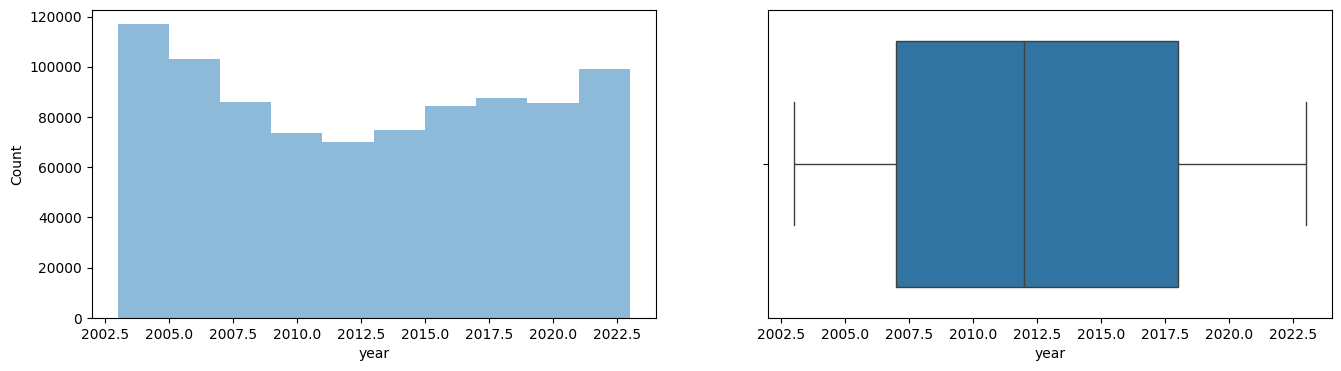

In [ ]:
plotvariable(df,'year')

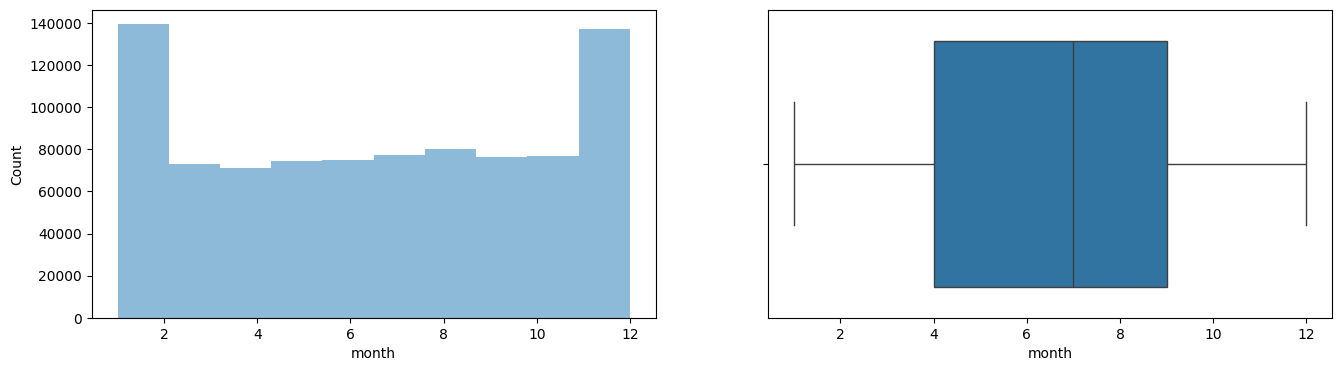

In [ ]:
plotvariable(df,'month')

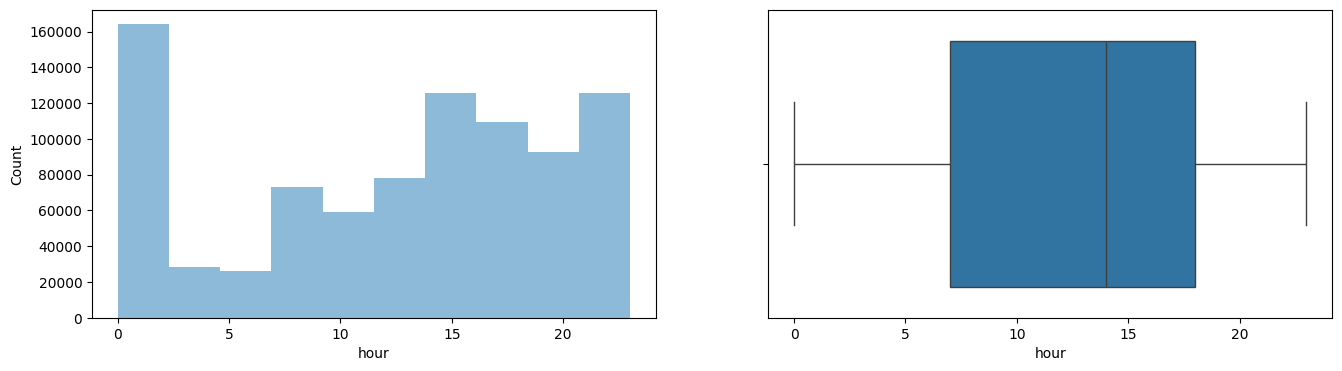

In [ ]:
plotvariable(df,'hour')

In [ ]:
df.shape

(881087, 13)

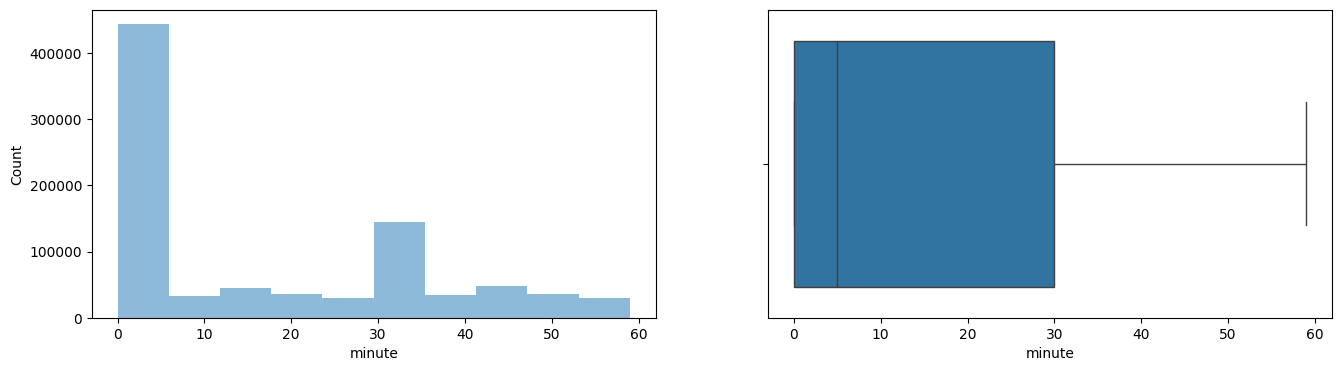

In [ ]:
plotvariable(df,'minute')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881087 entries, 1 to 881241
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   type           881087 non-null  object        
 1   year           881087 non-null  int64         
 2   month          881087 non-null  int64         
 3   day            881087 non-null  int64         
 4   hour           881087 non-null  int64         
 5   minute         881087 non-null  int64         
 6   address        881087 non-null  object        
 7   neighbourhood  881087 non-null  object        
 8   longitude      881087 non-null  float64       
 9   latitude       881087 non-null  float64       
 10  date           881087 non-null  datetime64[ns]
 11  time           881087 non-null  object        
 12  dayofweek      881087 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 94.1+ MB


In [ ]:
# describing the data
df.describe()

,year,month,day,hour,minute,longitude,latitude,date
count,881087.000000,881087.000000,881087.000000,881087.000000,881087.000000,881087.000000,8.810870e+05,881087
mean,2012.281527,6.522821,15.384223,12.311363,15.863084,448970.207311,4.977434e+06,2012-10-11 22:55:10.618815232
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,2003-01-01 00:00:00
25%,2007.000000,4.000000,8.000000,7.000000,0.000000,490187.874500,5.454210e+06,2007-01-03 00:00:00
50%,2012.000000,7.000000,15.000000,14.000000,5.000000,491570.614600,5.457169e+06,2012-09-30 00:00:00
75%,2018.000000,9.000000,23.000000,18.000000,30.000000,493380.107600,5.458718e+06,2018-03-14 00:00:00
max,2023.000000,12.000000,31.000000,23.000000,59.000000,498325.516000,5.462300e+06,2023-11-24 00:00:00
std,6.192622,3.393518,8.753377,7.464652,18.361595,139359.512151,1.544738e+06,NaN


In [ ]:
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday


### 3) Explore

In [ ]:
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday


In [ ]:
# Check the column names of the DataFrame
df.columns


Index(['type', 'year', 'month', 'day', 'hour', 'minute', 'address',
       'neighbourhood', 'longitude', 'latitude', 'date', 'time', 'dayofweek'],
      dtype='object')

### What's the distribution of crimes per day?

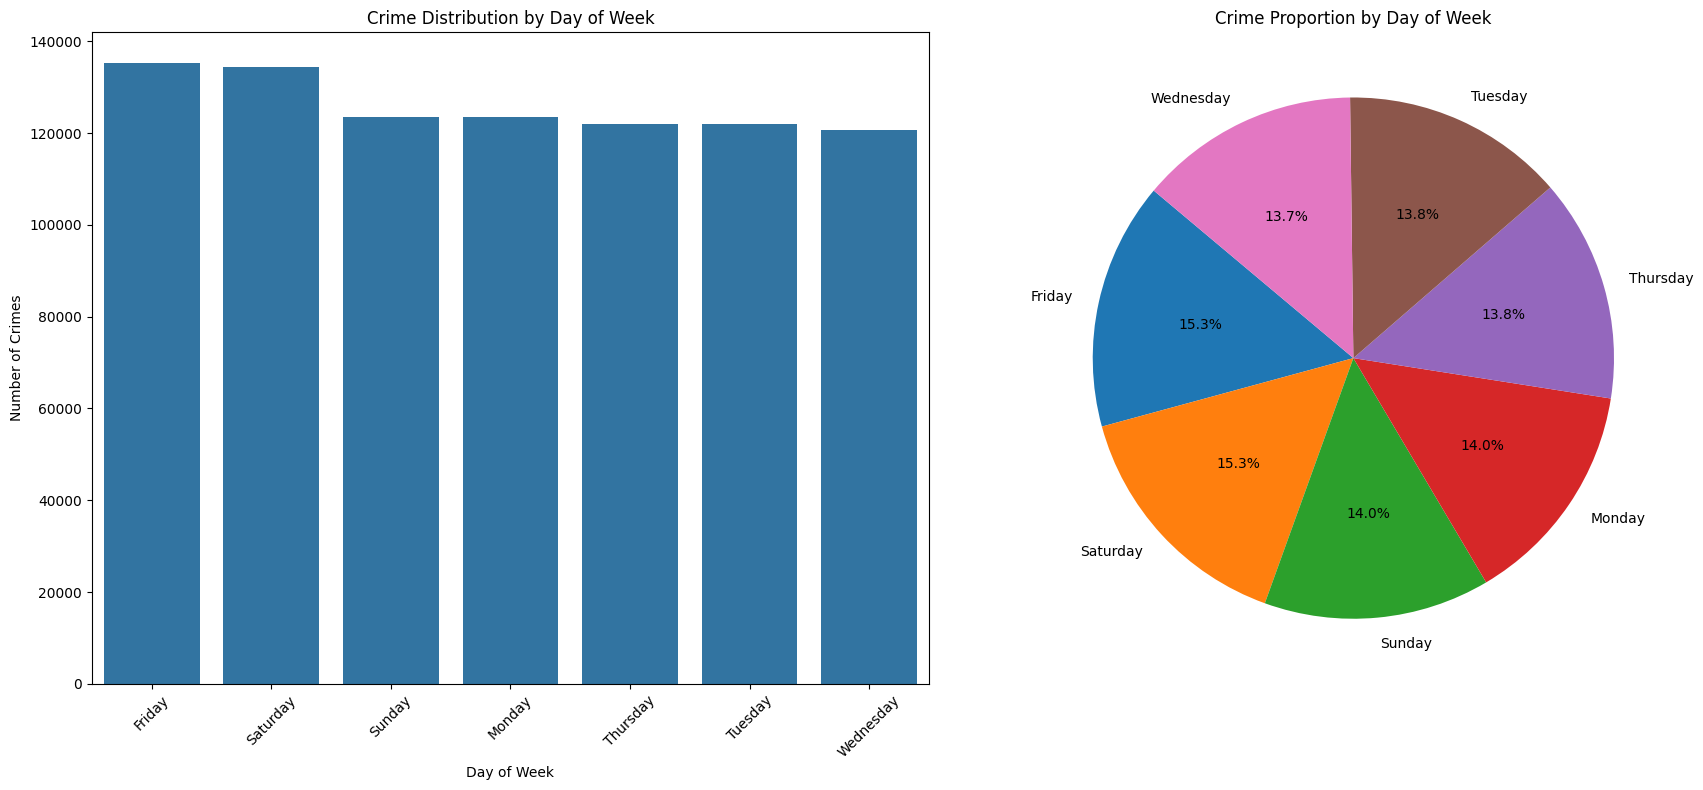

In [ ]:

# Create a subplot with 1 row and 2 columns
#plt.style.use('dark_background')  # Apply dark background
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot: Crime Distribution by Day of Week
sns.countplot(
    x='dayofweek',
    data=df,
    order=df['dayofweek'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Crime Distribution by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Crimes')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Pie Chart: Crime Proportion by Day of Week
day_counts = df['dayofweek'].value_counts()
axes[1].pie(
    day_counts,
    labels=day_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title('Crime Proportion by Day of Week')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday


###  time series graph with crimes per day.

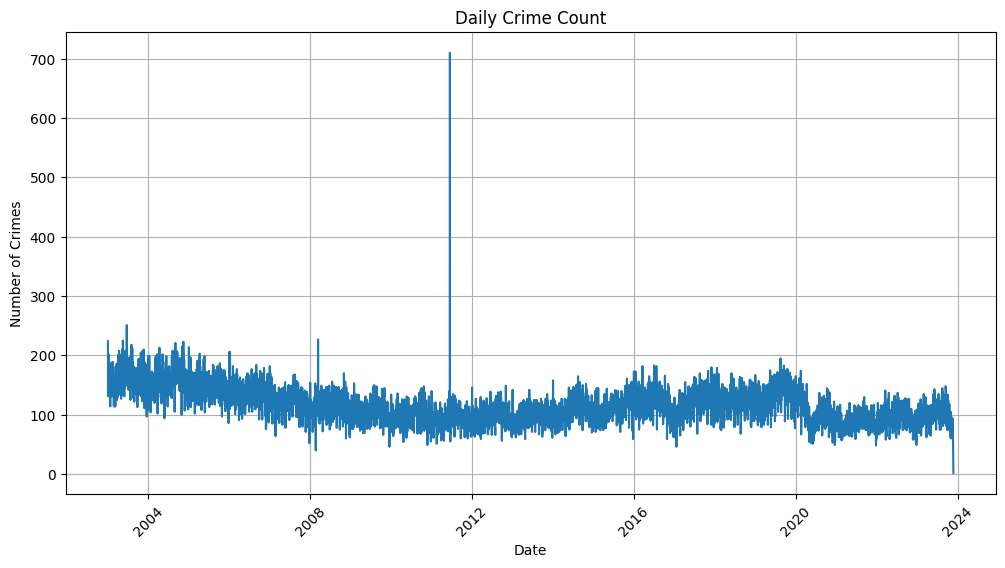

In [ ]:


# Assuming your DataFrame is named 'df' and the 'date' column is already in datetime format

# Group the data by date and count the number of crimes per day
df_daily_crimes = df.groupby('date').size().reset_index(name='num_crimes')

# Set the 'date' column as the index
df_daily_crimes.set_index('date', inplace=True)

# Apply dark background
#plt.style.use('dark_background')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_daily_crimes.index, df_daily_crimes['num_crimes'])
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Plotting various types of crimes

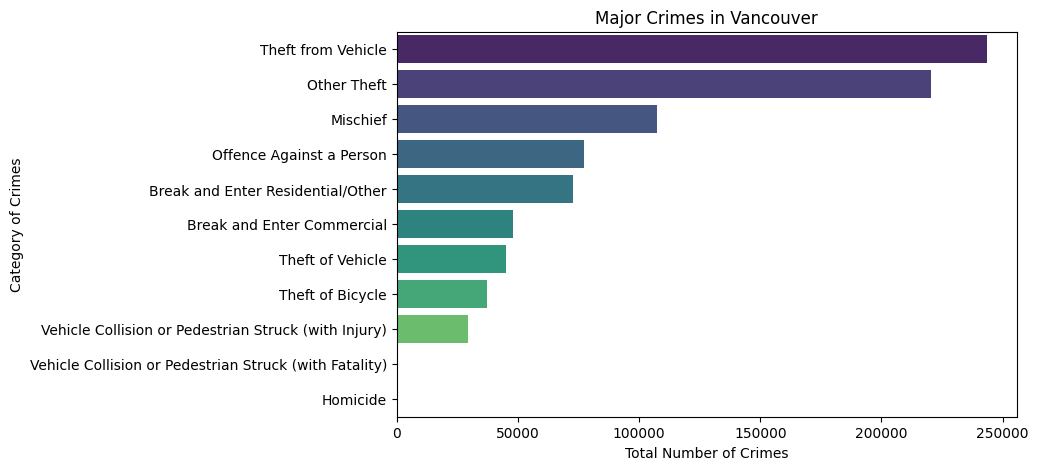

In [ ]:
# Plotting various types of crimes
# Apply dark background
#plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 5))

# Create a barplot
sns.barplot(x=df['type'].value_counts(), y=df['type'].value_counts().index, palette='viridis')

plt.title('Major Crimes in Vancouver')
plt.ylabel('Category of Crimes')
plt.xlabel('Total Number of Crimes')
plt.show()


### distribution of crimes as per type

In [ ]:
# Define colors for the pie chart
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

# Create the Pie chart
fig = go.Figure(data=[go.Pie(
    labels=df['type'].value_counts().index,
    values=df['type'].value_counts()
)])

# Update the trace and layout for dark background and other styling
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(
        colors=colors,
        line=dict(color='#555555', width=3)
    )
)


# Show the plot
fig.show()


####  What is the trend in Vancouver's crime rate?

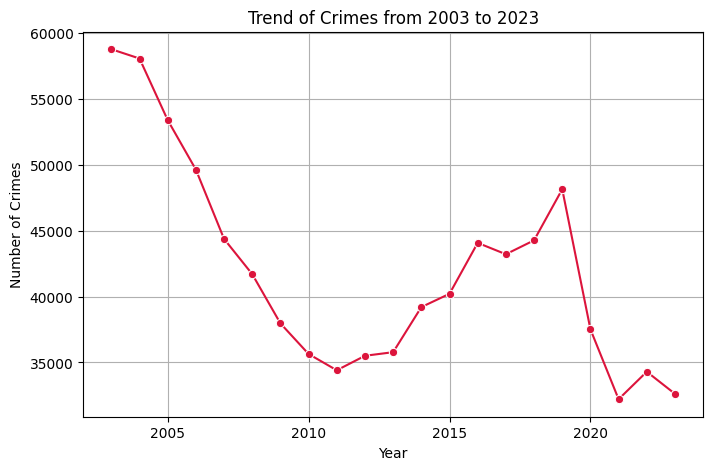

In [ ]:
# Trend of crimes from 2003 to 2023
year_count = df['year'].value_counts().sort_index()  # Ensure the years are sorted
#plt.style.use('dark_background')
plt.figure(figsize=(8, 5))

# Create a lineplot
ax = sns.lineplot(x=year_count.index, y=year_count.values, marker="o", color='crimson')

plt.title('Trend of Crimes from 2003 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
ax.locator_params(integer=True)
plt.grid()

# Save the figure
plt.show()


### yearly count of crime in Vancouver

In [ ]:
# yearly count of crime in Vancouver
# year number
year_num = sorted(df["year"].unique())

# type of crime
type_of_crime = sorted(df["type"].unique().tolist())

# create dataframe
crime_year = pd.DataFrame(columns =["year"])
crime_year["year"] = year_num
crime_year

for i in type_of_crime:
    new_crime = df[df["type"]== i]
    new_crime_count = new_crime["year"].value_counts(sort=False)
    new_crime_index = new_crime_count.index.tolist()
    new_crime_index, new_crime_count = zip(*sorted(zip(new_crime_index, new_crime_count)))
    crime_year[i] = new_crime_count
crime_year

,year,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,2003,3196,6884,17,6387,3507,11423,17743,1419,6360,25,1824
1,2004,3279,6533,22,5598,3791,11435,18202,1230,6100,22,1868
2,2005,2639,5538,22,5062,3760,11355,16552,1416,5029,32,1999
3,2006,2845,5673,18,5180,4345,10300,14730,1467,3681,20,1383
4,2007,2436,4996,19,4812,4400,9722,12227,1203,3304,24,1238
5,2008,2225,4429,18,5270,4209,9463,11295,1176,2417,17,1185
6,2009,1859,3497,18,4425,3878,9470,10007,1641,1880,14,1278
7,2010,1659,3266,10,4514,3742,9366,8614,1669,1465,10,1327
8,2011,1750,3230,15,4833,3874,9388,7434,1517,1094,12,1260
9,2012,1686,3311,8,4228,3760,9960,8096,1817,1152,18,1472


In [ ]:
crime_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   year                                                    21 non-null     int64
 1   Break and Enter Commercial                              21 non-null     int64
 2   Break and Enter Residential/Other                       21 non-null     int64
 3   Homicide                                                21 non-null     int64
 4   Mischief                                                21 non-null     int64
 5   Offence Against a Person                                21 non-null     int64
 6   Other Theft                                             21 non-null     int64
 7   Theft from Vehicle                                      21 non-null     int64
 8   Theft of Bicycle                                        21 non

In [ ]:
# renaming column names
crime_year = crime_year.rename({'Break and Enter Commercial': 'break_and_enter_commercial', 'Break and Enter Residential/Other': 'break_and_enter_residential_other'
                ,'Homicide':'homicide','Mischief':'mischief','Offence Against a Person':'offence_against_a_person','Other Theft':'other_theft'
                ,'Theft from Vehicle':'theft_from_vehicle','Theft of Bicycle':'theft_of_bicycle','Theft of Vehicle':'theft_of_vehicle'
                ,'Vehicle Collision or Pedestrian Struck (with Fatality)':'vehicle_collision_or_pedestrian_struck_with_fatality'
                ,'Vehicle Collision or Pedestrian Struck (with Injury)':'vehicle_collision_or_pedestrian_struck_with_injury'}, axis=1)
crime_year

,year,break_and_enter_commercial,break_and_enter_residential_other,homicide,mischief,offence_against_a_person,other_theft,theft_from_vehicle,theft_of_bicycle,theft_of_vehicle,vehicle_collision_or_pedestrian_struck_with_fatality,vehicle_collision_or_pedestrian_struck_with_injury
0,2003,3196,6884,17,6387,3507,11423,17743,1419,6360,25,1824
1,2004,3279,6533,22,5598,3791,11435,18202,1230,6100,22,1868
2,2005,2639,5538,22,5062,3760,11355,16552,1416,5029,32,1999
3,2006,2845,5673,18,5180,4345,10300,14730,1467,3681,20,1383
4,2007,2436,4996,19,4812,4400,9722,12227,1203,3304,24,1238
5,2008,2225,4429,18,5270,4209,9463,11295,1176,2417,17,1185
6,2009,1859,3497,18,4425,3878,9470,10007,1641,1880,14,1278
7,2010,1659,3266,10,4514,3742,9366,8614,1669,1465,10,1327
8,2011,1750,3230,15,4833,3874,9388,7434,1517,1094,12,1260
9,2012,1686,3311,8,4228,3760,9960,8096,1817,1152,18,1472


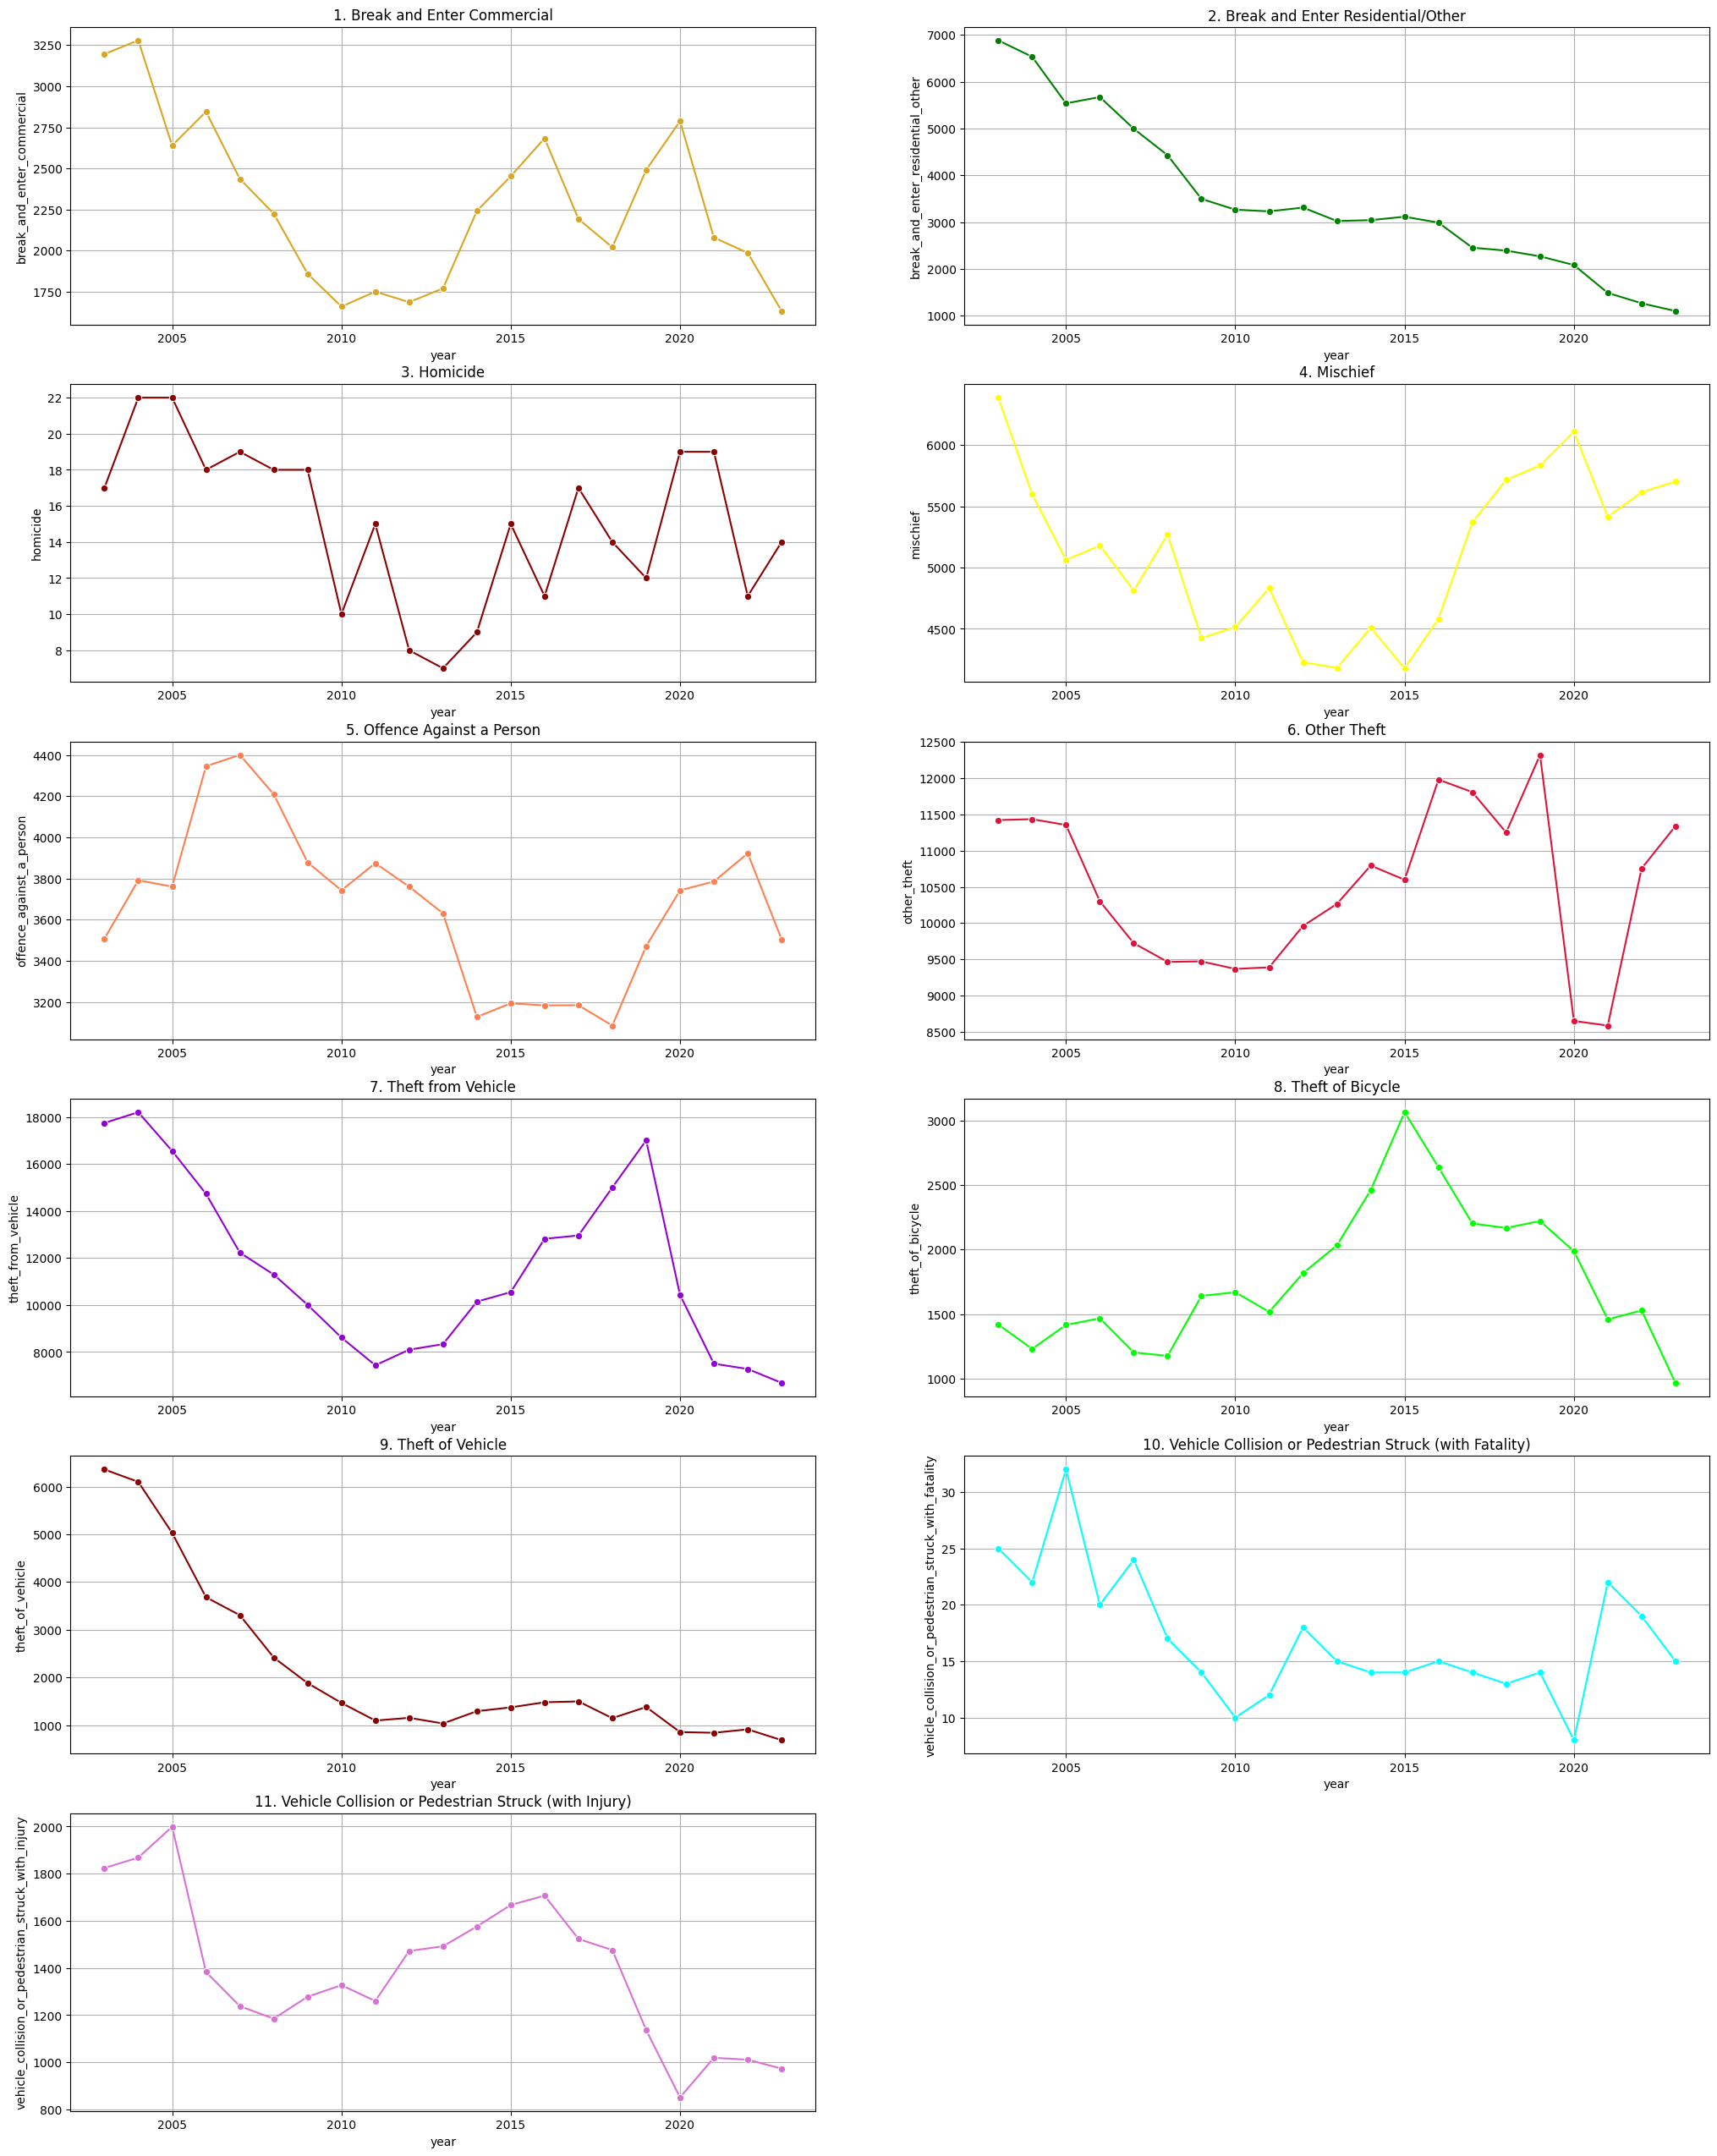

In [ ]:
# plotting distribution of each crime by type from 2003 t0 2023
#plt.style.use('dark_background')
fig, ax = plt.subplots(6, 2, figsize=(25,32))

ax[0,0].set_title('1. Break and Enter Commercial')
sns.lineplot(ax=ax[0,0], x = crime_year.year, y =  crime_year.break_and_enter_commercial, color = 'goldenrod',marker="o")
ax[0,0].locator_params(integer=True)
ax[0,0].grid()

ax[0,1].set_title('2. Break and Enter Residential/Other')
sns.lineplot(ax=ax[0,1], x = crime_year.year, y =  crime_year.break_and_enter_residential_other, color = 'g',marker="o")
ax[0,1].locator_params(integer=True)
ax[0,1].grid()

ax[1,0].set_title('3. Homicide')
sns.lineplot(ax=ax[1,0], x =  crime_year.year, y =  crime_year.homicide, color = 'darkred',marker="o")
ax[1,0].locator_params(integer=True)
ax[1,0].grid()

ax[1,1].set_title('4. Mischief')
sns.lineplot(ax=ax[1,1], x = crime_year.year, y = crime_year.mischief, color = 'yellow',marker="o")
ax[1,1].locator_params(integer=True)
ax[1,1].grid()

ax[2,0].set_title('5. Offence Against a Person')
sns.lineplot(ax=ax[2,0], x = crime_year.year, y =  crime_year.offence_against_a_person, color = 'coral',marker="o")
ax[2,0].locator_params(integer=True)
ax[2,0].grid()

ax[2,1].set_title('6. Other Theft')
sns.lineplot(ax=ax[2,1], x = crime_year.year, y =  crime_year.other_theft, color = 'crimson',marker="o")
ax[2,1].locator_params(integer=True)
ax[2,1].grid()

ax[3,0].set_title('7. Theft from Vehicle')
sns.lineplot(ax=ax[3,0], x = crime_year.year, y =  crime_year.theft_from_vehicle, color = 'darkviolet',marker="o")
ax[3,0].locator_params(integer=True)
ax[3,0].grid()

ax[3,1].set_title('8. Theft of Bicycle')
sns.lineplot(ax=ax[3,1], x = crime_year.year, y =  crime_year.theft_of_bicycle, color = 'lime',marker="o")
ax[3,1].locator_params(integer=True)
ax[3,1].grid()

ax[4,0].set_title('9. Theft of Vehicle')
sns.lineplot(ax=ax[4,0], x = crime_year.year, y =  crime_year.theft_of_vehicle, color = 'darkred',marker="o")
ax[4,0].locator_params(integer=True)
ax[4,0].grid()

ax[4,1].set_title('10. Vehicle Collision or Pedestrian Struck (with Fatality)')
sns.lineplot(ax=ax[4,1], x = crime_year.year, y =  crime_year.vehicle_collision_or_pedestrian_struck_with_fatality, color = 'cyan',marker="o")
ax[4,1].locator_params(integer=True)
ax[4,1].grid()

ax[5,0].set_title('11. Vehicle Collision or Pedestrian Struck (with Injury)')
sns.lineplot(ax=ax[5,0], x = crime_year.year, y =  crime_year.vehicle_collision_or_pedestrian_struck_with_injury, color = 'orchid',marker="o")
fig.delaxes(ax[5,1])
ax[5,0].locator_params(integer=True)
ax[5,0].grid()

# Save the figure to a file
fig.savefig('crime_distribution_by_type.png', bbox_inches='tight', dpi=300)

In [ ]:
# percentage change in crimes from 2003 to 2023
initial_year = crime_year.iloc[0,1:]
crime_percent_change = 100 * round((crime_year.iloc[:,1:] - initial_year) / initial_year, 2)
crime_percent_change["year"] = year_num
crime_percent_change

,break_and_enter_commercial,break_and_enter_residential_other,homicide,mischief,offence_against_a_person,other_theft,theft_from_vehicle,theft_of_bicycle,theft_of_vehicle,vehicle_collision_or_pedestrian_struck_with_fatality,vehicle_collision_or_pedestrian_struck_with_injury,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003
1,3.0,-5.0,29.0,-12.0,8.0,0.0,3.0,-13.0,-4.0,-12.0,2.0,2004
2,-17.0,-20.0,29.0,-21.0,7.0,-1.0,-7.0,-0.0,-21.0,28.0,10.0,2005
3,-11.0,-18.0,6.0,-19.0,24.0,-10.0,-17.0,3.0,-42.0,-20.0,-24.0,2006
4,-24.0,-27.0,12.0,-25.0,25.0,-15.0,-31.0,-15.0,-48.0,-4.0,-32.0,2007
5,-30.0,-36.0,6.0,-17.0,20.0,-17.0,-36.0,-17.0,-62.0,-32.0,-35.0,2008
6,-42.0,-49.0,6.0,-31.0,11.0,-17.0,-44.0,16.0,-70.0,-44.0,-30.0,2009
7,-48.0,-53.0,-41.0,-29.0,7.0,-18.0,-51.0,18.0,-77.0,-60.0,-27.0,2010
8,-45.0,-53.0,-12.0,-24.0,10.0,-18.0,-58.0,7.0,-83.0,-52.0,-31.0,2011
9,-47.0,-52.0,-53.0,-34.0,7.0,-13.0,-54.0,28.0,-82.0,-28.0,-19.0,2012


In [ ]:
df.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday


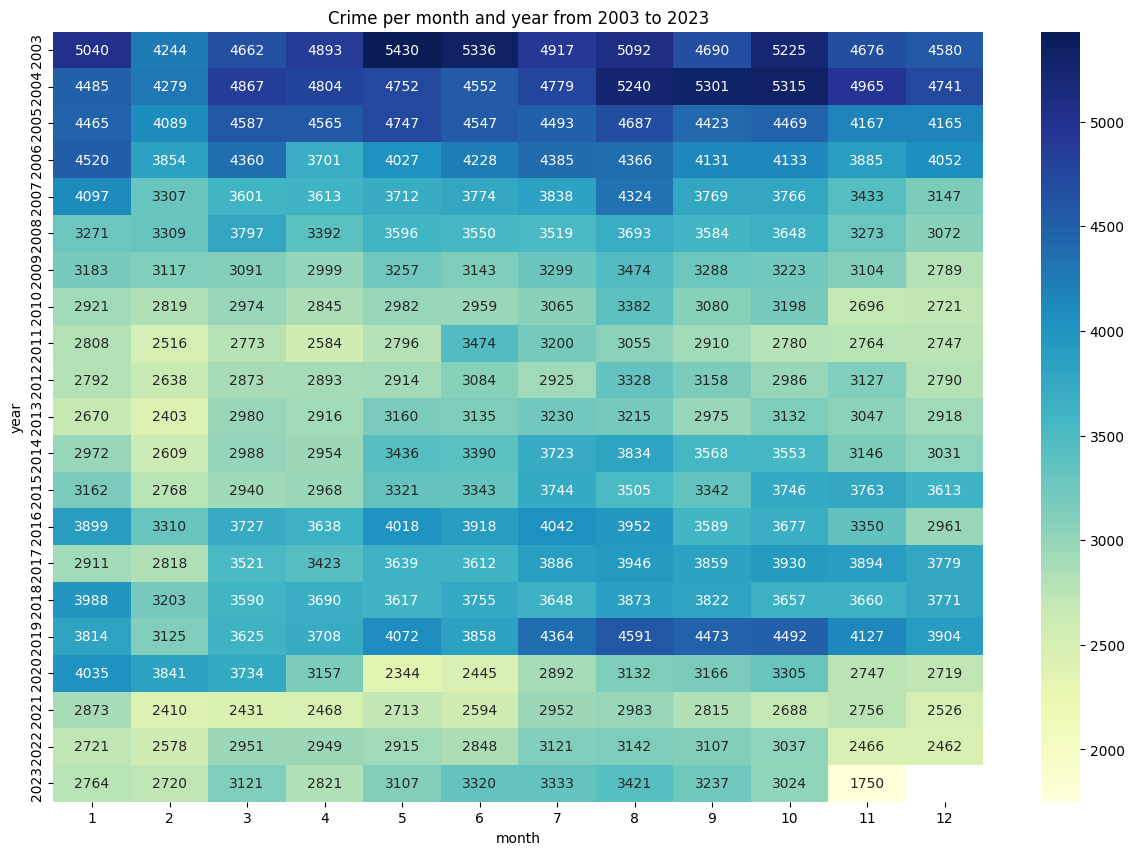

In [ ]:
# Plotting month vs year crime count of Vancouver from 2003 to 2023
crime_count = df.groupby(["month", "year"]).size().reset_index(name="total")
crime_heat = crime_count.pivot(index='year', columns='month', values='total')

# Plot the heatmap
fig = plt.figure(figsize=(15, 10))
sns.heatmap(crime_heat, annot=True, cmap='YlGnBu', fmt="g")
plt.title('Crime per month and year from 2003 to 2023')
plt.show()

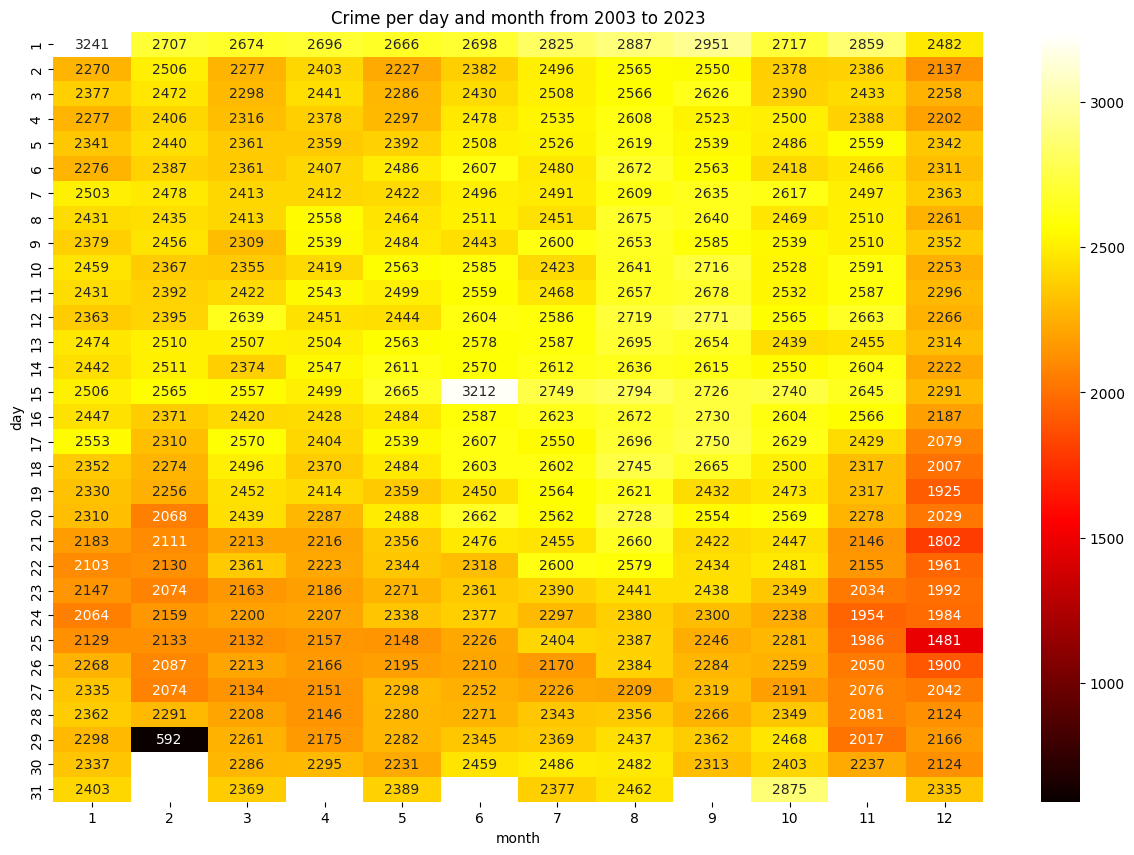

In [ ]:
# Plotting day vs month crime count of Vancouver from 2003 to 2023
crime_count = df.groupby(["day", "month"]).size().reset_index(name="total")
crime_heat = crime_count.pivot(index='day', columns='month', values='total')  # Corrected pivot syntax

fig = plt.figure(figsize=(15,10))
sns.heatmap(crime_heat, annot=True, cmap='hot', fmt="2g")
plt.title('Crime per day and month from 2003 to 2023')
plt.show()



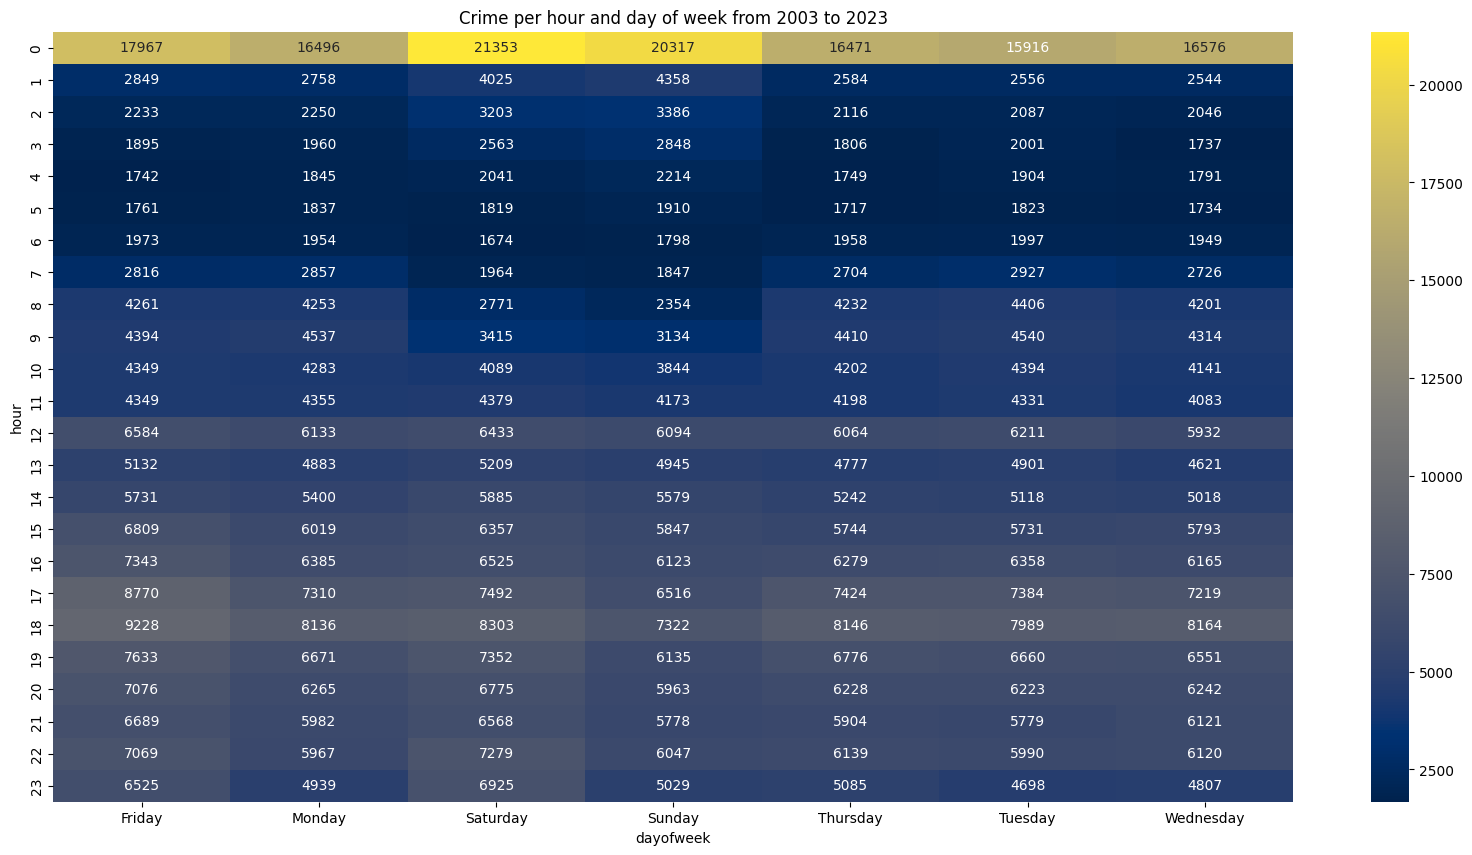

In [ ]:
# Plotting hour vs day crime count of Vancouver from 2003 to 2023
crime_count = df.groupby(["hour", "dayofweek"]).size().reset_index(name="total")
crime_heat = crime_count.pivot(index='hour', columns='dayofweek', values='total')  # Corrected pivot syntax

fig = plt.figure(figsize=(20,10))
sns.heatmap(crime_heat, annot=True, cmap='cividis', fmt="2g")
plt.title('Crime per hour and day of week from 2003 to 2023')
plt.show()

### top 5 crime types in Vancouver

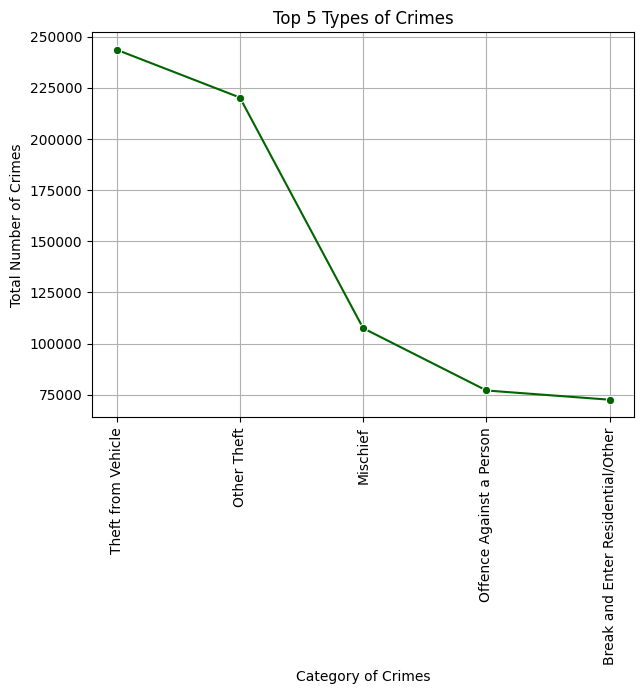

In [ ]:
# Plotting the top 5 crime types in Vancouver
type_count5 = df['type'].value_counts().head(5)
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(7, 5))
sns.lineplot(x=type_count5.index, y=type_count5.values, marker="o", color='darkgreen')
plt.title('Top 5 Types of Crimes')
plt.xticks(rotation=90)
plt.xlabel('Category of Crimes')
plt.ylabel('Total Number of Crimes')
plt.grid()
plt.show()


### crimes of neighbourhood of Vancouver

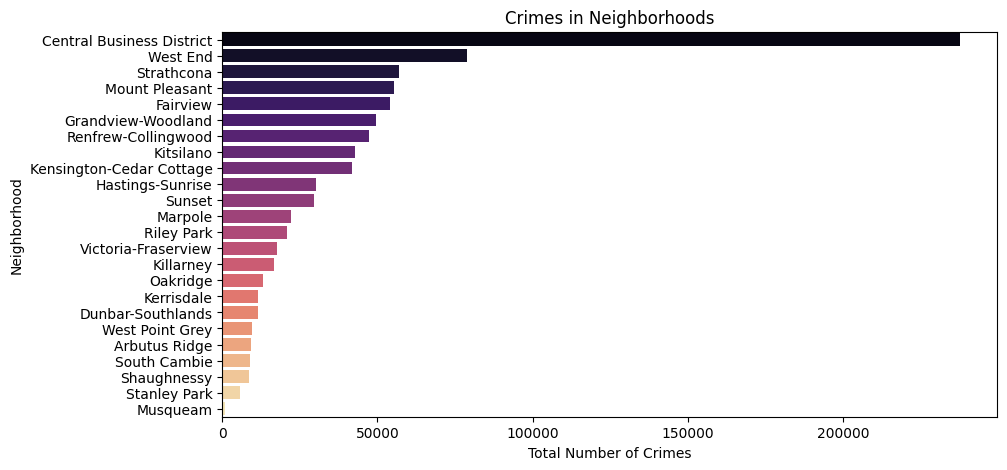

In [ ]:
# Plotting crimes in neighborhoods of Vancouver
neigh_count = df['neighbourhood'].value_counts()
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.barplot(x=neigh_count.values, y=neigh_count.index, palette='magma')
plt.title('Crimes in Neighborhoods')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Crimes')
plt.show()


### Q3. Which are the most dangerous neighbourhoods in Vancouver?

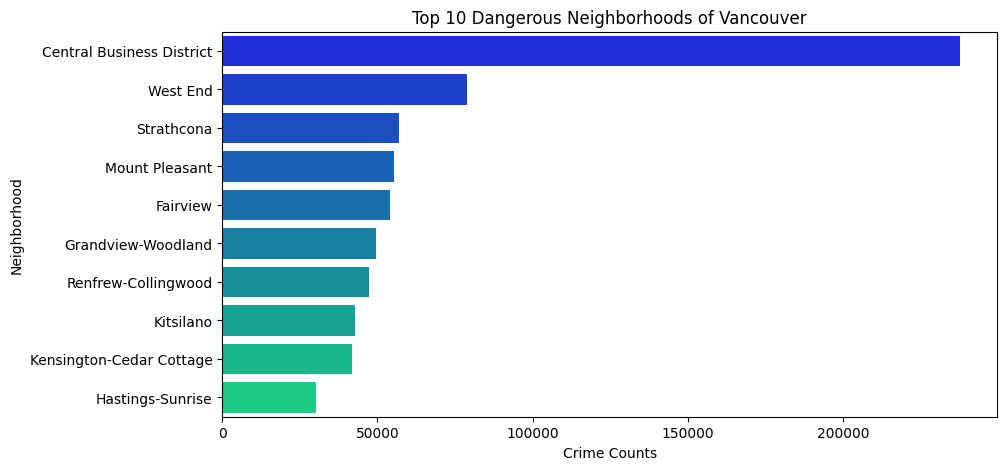

In [ ]:
# Plotting top 10 dangerous neighborhoods of Vancouver
neigh_count = df['neighbourhood'].value_counts().head(10)
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.barplot(x=neigh_count.values, y=neigh_count.index, palette='winter')
plt.title('Top 10 Dangerous Neighborhoods of Vancouver')
plt.ylabel('Neighborhood')
plt.xlabel('Crime Counts')
plt.show()


### top 10 dangerous blocks of Vancouver

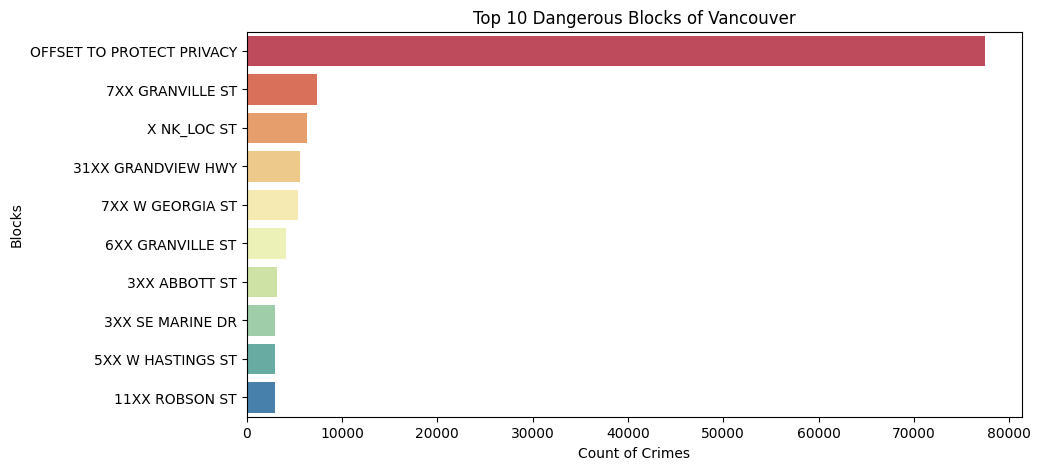

In [ ]:
# Plotting top 10 dangerous blocks of Vancouver
add_count = df['address'].value_counts().head(10)
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.barplot(x=add_count.values, y=add_count.index, palette='Spectral')
plt.title('Top 10 Dangerous Blocks of Vancouver')
plt.ylabel('Blocks')
plt.xlabel('Count of Crimes')
plt.show()


In [ ]:
# Check for entries in the 'address' column that contain the phrase "OFFSET TO PROTECT PRIVACY"
offset_privacy_entries = df[df['address'].str.contains("OFFSET TO PROTECT PRIVACY", na=False)]

# Display the results
print(offset_privacy_entries)


                            type  year  month  day  hour  minute  \
120489                  Homicide  2018     12   22     0       0   
120490                  Homicide  2017      2    1     0       0   
120491                  Homicide  2017      7    9     0       0   
120492                  Homicide  2016      9   28     0       0   
120493                  Homicide  2017     10   13     0       0   
...                          ...   ...    ...  ...   ...     ...   
305454  Offence Against a Person  2023      8    9     0       0   
305455  Offence Against a Person  2023      8   16     0       0   
305456  Offence Against a Person  2023      8   27     0       0   
305457  Offence Against a Person  2023     10    4     0       0   
305458  Offence Against a Person  2023     10   29     0       0   

                          address neighbourhood  longitude  latitude  \
120489  OFFSET TO PROTECT PRIVACY    Strathcona        0.0       0.0   
120490  OFFSET TO PROTECT PRIVACY  Stan

### top 10 dangerous blocks of Vancouver without offset to protect privacy

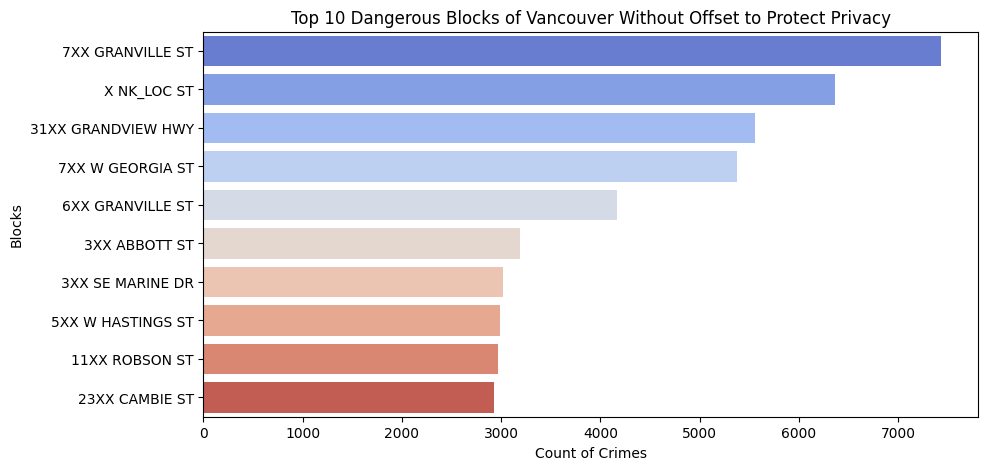

In [ ]:
# Filtering the DataFrame to exclude entries with "OFFSET TO PROTECT PRIVACY"
add_count = df[~df['address'].str.contains("OFFSET TO PROTECT PRIVACY", na=False)]['address'].value_counts().head(10)

# Plotting the top 10 dangerous blocks of Vancouver without offset to protect privacy
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.barplot(x=add_count.values, y=add_count.index, palette='coolwarm')
plt.title('Top 10 Dangerous Blocks of Vancouver Without Offset to Protect Privacy')
plt.ylabel('Blocks')
plt.xlabel('Count of Crimes')
plt.show()


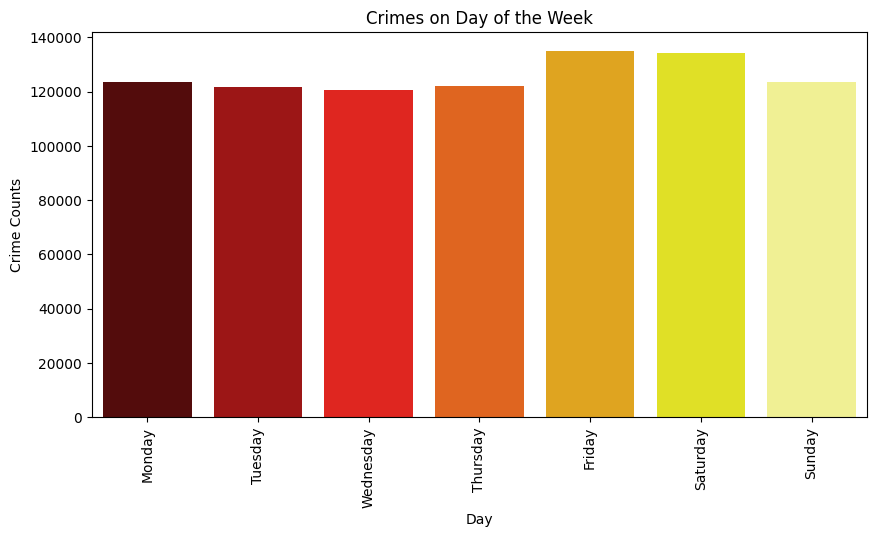

In [ ]:
# Creating a categorical variable for days of the week
day_count = pd.Categorical(df['dayofweek'], categories=
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

# Plotting the count of crimes that occurred on each day of the week
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(x=day_count, palette='hot')
plt.title('Crimes on Day of the Week')
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Crime Counts')
plt.show()


### Q4. At what hour the theft from vehicle is at peak?

<Figure size 1000x500 with 0 Axes>

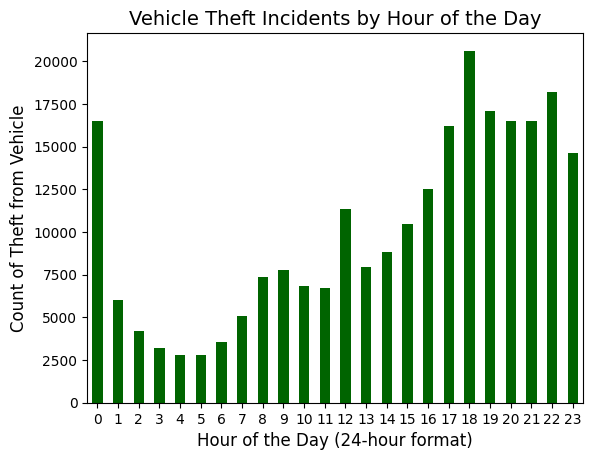

In [ ]:
# Filtering the DataFrame for vehicle theft incidents
vehicle_theft = df[(df['type'] == "Theft from Vehicle")]

# Grouping by hour and counting occurrences
vehicle_hour = vehicle_theft[['type', 'hour']].groupby(['hour'], as_index=False).count()

# Plotting the count of vehicle theft incidents by hour in a 24-hour format
# Apply dark background style
#plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
vehicle_hour.plot(kind='bar', x='hour', color='darkgreen', legend=False)
plt.xlabel("Hour of the Day (24-hour format)", fontsize=12)
plt.ylabel("Count of Theft from Vehicle", fontsize=12)
plt.title("Vehicle Theft Incidents by Hour of the Day", fontsize=14)
plt.xticks(rotation=0)  # Optional: Rotate x-ticks for better visibility
plt.show()


In [ ]:
df.head(10)

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday
6,Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2021-11-21,06:33:00,Sunday
7,Break and Enter Commercial,2022,1,5,7,34,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2022-01-05,07:34:00,Wednesday
8,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.3857,5.459161e+06,2005-11-14,03:09:00,Monday
9,Break and Enter Commercial,2006,5,21,4,50,10XX ALBERNI ST,West End,491021.3857,5.459161e+06,2006-05-21,04:50:00,Sunday
10,Break and Enter Commercial,2009,7,1,0,35,10XX ALBERNI ST,West End,491021.3857,5.459161e+06,2009-07-01,00:35:00,Wednesday


**Feature** **Engineering**

#### Encode Categorical Variables

In [ ]:
df_new = df.copy()

In [ ]:
df_new

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,2019-03-07,02:06:00,Thursday
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,2019-08-27,04:12:00,Tuesday
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,2021-04-26,04:44:00,Monday
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2014-08-08,05:13:00,Friday
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,2020-07-28,19:12:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881237,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2003-09-01,20:45:00,Monday
881238,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2005-07-20,18:57:00,Wednesday
881239,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,2016-06-20,18:11:00,Monday
881240,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06,2013-12-03,09:49:00,Tuesday


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_columns = ['type', 'address', 'neighbourhood', 'dayofweek']
for col in categorical_columns:
    df_new[col] = label_encoder.fit_transform(df_new[col])


In [ ]:
df_new.head(10)

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,490612.9648,5.457110e+06,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,491004.8164,5.459177e+06,2019-08-27,04:12:00,5
3,0,2021,4,26,4,44,16,22,491007.7798,5.459174e+06,2021-04-26,04:44:00,1
4,0,2014,8,8,5,13,16,22,491015.9434,5.459166e+06,2014-08-08,05:13:00,0
5,0,2020,7,28,19,12,16,22,491015.9434,5.459166e+06,2020-07-28,19:12:00,5
6,0,2021,11,21,6,33,16,22,491015.9434,5.459166e+06,2021-11-21,06:33:00,3
7,0,2022,1,5,7,34,16,22,491015.9434,5.459166e+06,2022-01-05,07:34:00,6
8,0,2005,11,14,3,9,16,22,491021.3857,5.459161e+06,2005-11-14,03:09:00,1
9,0,2006,5,21,4,50,16,22,491021.3857,5.459161e+06,2006-05-21,04:50:00,3
10,0,2009,7,1,0,35,16,22,491021.3857,5.459161e+06,2009-07-01,00:35:00,6


###  Log Transformation (try to focus on this) end the feature part

In [ ]:
# Step 2: Apply Log Transformation
df_new['longitude'] = np.log(df_new['longitude'] + 1)  # Log transform longitude
df_new['latitude'] = np.log(df_new['latitude'] + 1)    # Log transform latitude

In [ ]:
df_new.head()

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,13.103413,15.512430,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,13.104211,15.512809,2019-08-27,04:12:00,5
3,0,2021,4,26,4,44,16,22,13.104217,15.512808,2021-04-26,04:44:00,1
4,0,2014,8,8,5,13,16,22,13.104234,15.512807,2014-08-08,05:13:00,0
5,0,2020,7,28,19,12,16,22,13.104234,15.512807,2020-07-28,19:12:00,5


In [ ]:
df_new1 = df_new.copy()

In [ ]:
df_new1

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,13.103413,15.512430,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,13.104211,15.512809,2019-08-27,04:12:00,5
3,0,2021,4,26,4,44,16,22,13.104217,15.512808,2021-04-26,04:44:00,1
4,0,2014,8,8,5,13,16,22,13.104234,15.512807,2014-08-08,05:13:00,0
5,0,2020,7,28,19,12,16,22,13.104234,15.512807,2020-07-28,19:12:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881237,10,2003,9,1,20,45,23426,15,13.105801,15.512070,2003-09-01,20:45:00,1
881238,10,2005,7,20,18,57,23426,15,13.105801,15.512070,2005-07-20,18:57:00,6
881239,10,2016,6,20,18,11,23426,15,13.105801,15.512070,2016-06-20,18:11:00,1
881240,10,2013,12,3,9,49,23426,15,13.105901,15.512066,2013-12-03,09:49:00,5


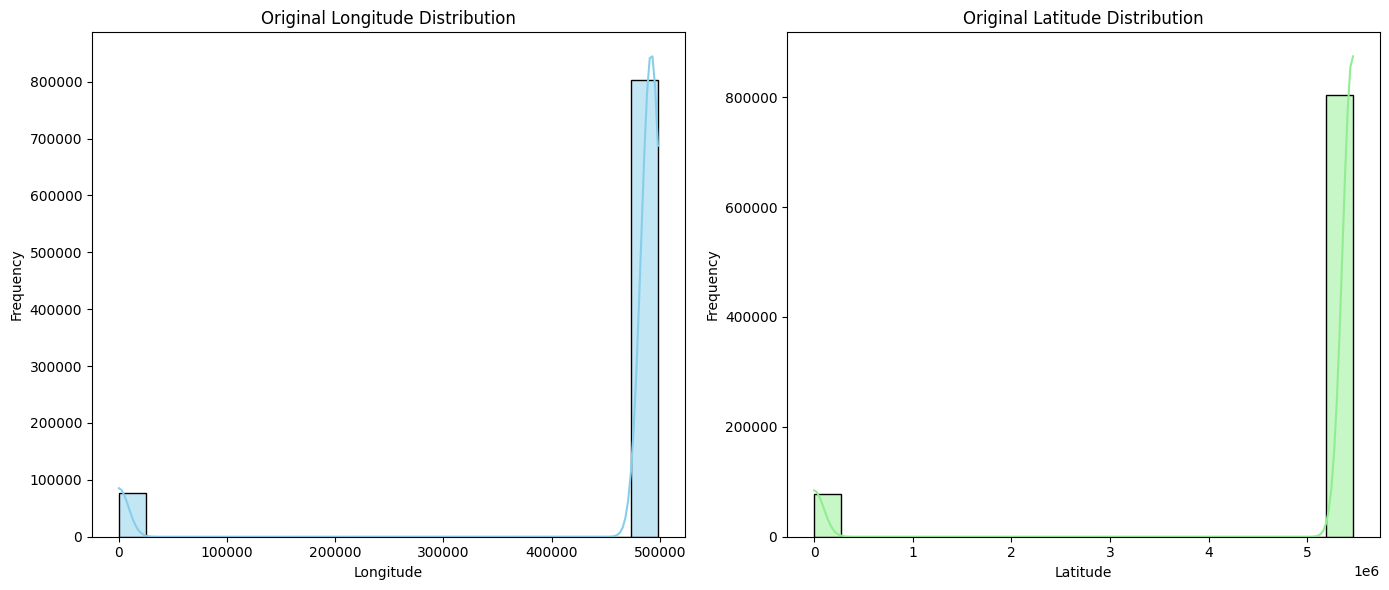

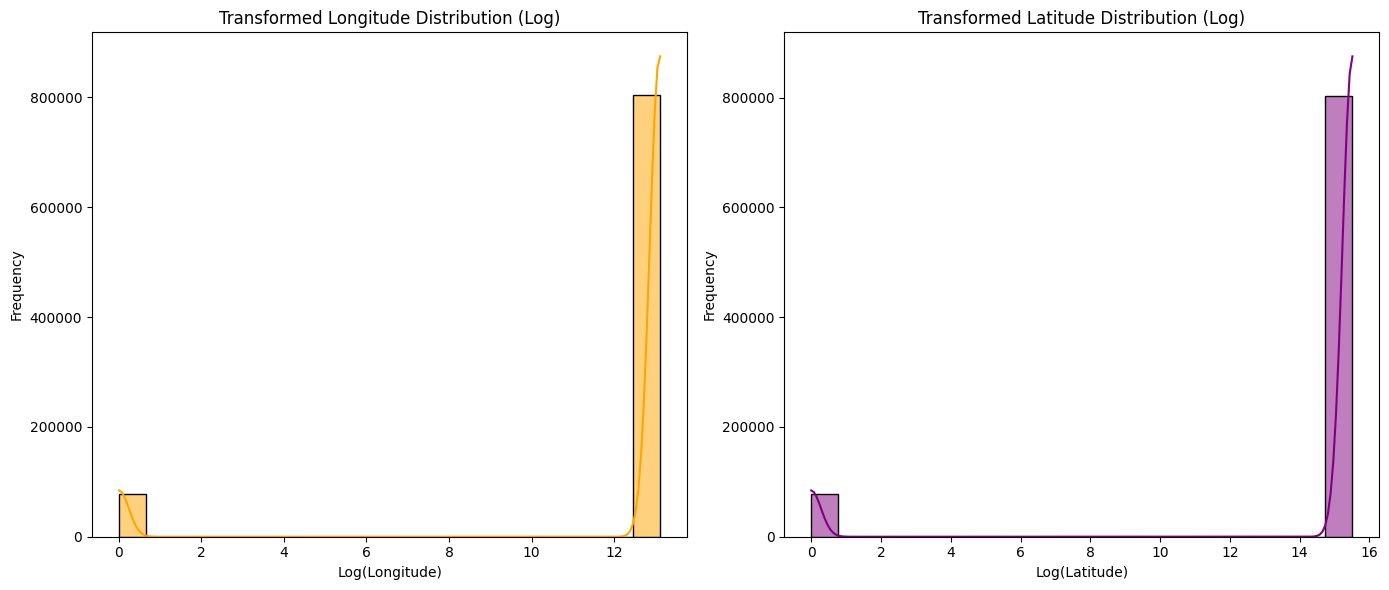

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before Log Transformation (using the original dataframe 'df')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot original longitude and latitude from the 'df' DataFrame
sns.histplot(df['longitude'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original Longitude Distribution')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Frequency')

sns.histplot(df['latitude'], bins=20, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Original Latitude Distribution')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# After Log Transformation (using the 'df_new' DataFrame)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot transformed longitude and latitude from the 'df_new' DataFrame
sns.histplot(df_new['longitude'], bins=20, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Transformed Longitude Distribution (Log)')
axes[0].set_xlabel('Log(Longitude)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_new['latitude'], bins=20, kde=True, color='purple', ax=axes[1])
axes[1].set_title('Transformed Latitude Distribution (Log)')
axes[1].set_xlabel('Log(Latitude)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


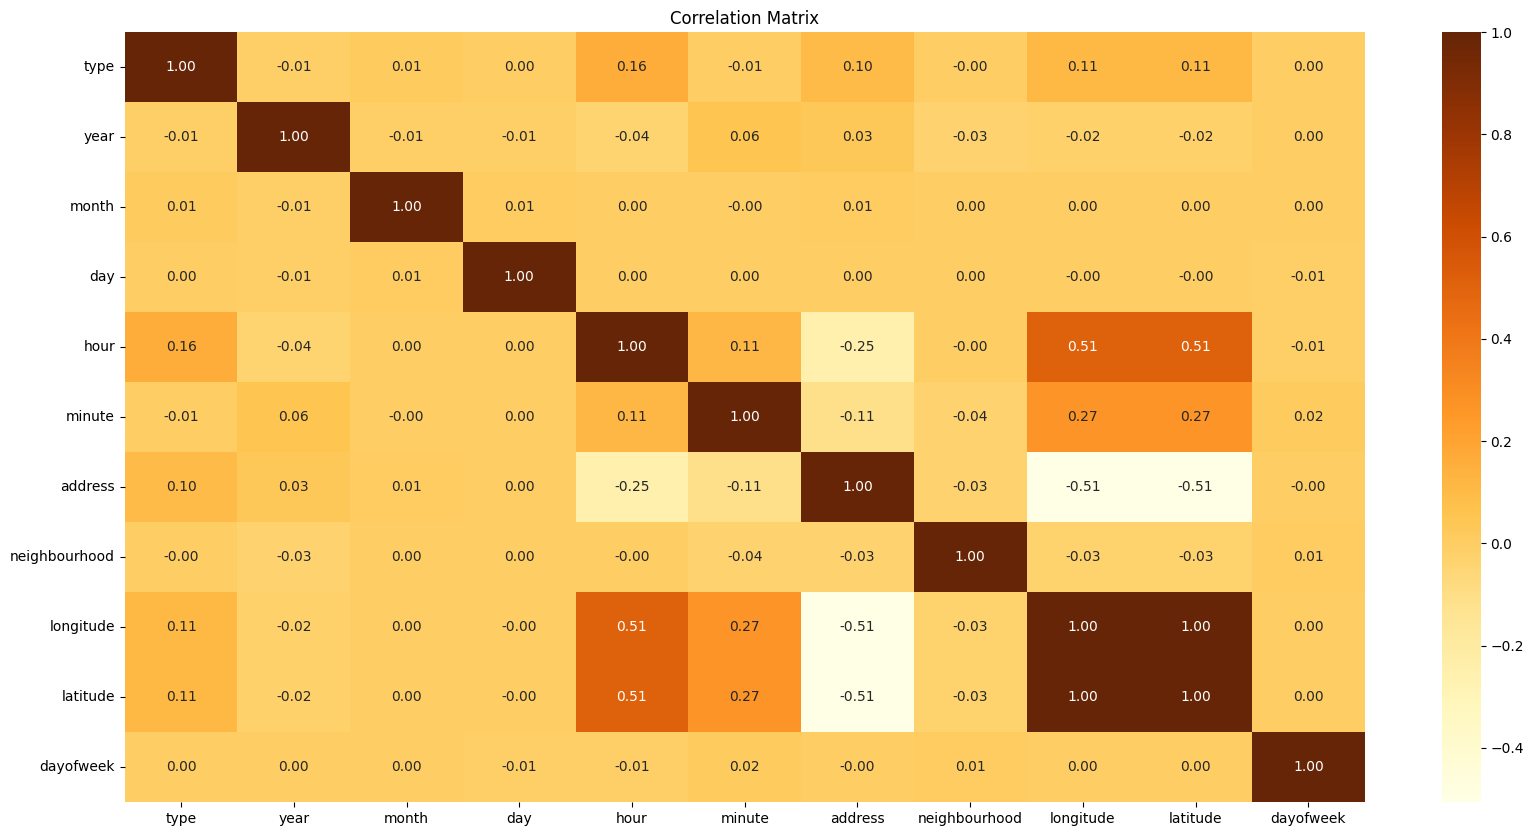

In [ ]:
# plotting correlation matrix
# Filter numeric columns only
numeric_df = df_new.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_mat = numeric_df.corr()


fig = plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df_filtered = df_new1[(df_new1['year'] >= 2019) & (df_new1['year'] <= 2023)]

In [ ]:
df_filtered

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,13.103413,15.512430,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,13.104211,15.512809,2019-08-27,04:12:00,5
3,0,2021,4,26,4,44,16,22,13.104217,15.512808,2021-04-26,04:44:00,1
5,0,2020,7,28,19,12,16,22,13.104234,15.512807,2020-07-28,19:12:00,5
6,0,2021,11,21,6,33,16,22,13.104234,15.512807,2021-11-21,06:33:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881211,10,2020,8,6,7,50,23418,15,13.105829,15.512149,2020-08-06,07:50:00,4
881221,10,2019,8,29,13,1,23422,11,13.105823,15.512429,2019-08-29,13:01:00,4
881223,10,2023,6,15,11,35,23424,11,13.105803,15.512373,2023-06-15,11:35:00,4
881235,10,2020,8,5,13,48,23425,11,13.105801,15.512358,2020-08-05,13:48:00,6


In [ ]:
df_new1

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,13.103413,15.512430,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,13.104211,15.512809,2019-08-27,04:12:00,5
3,0,2021,4,26,4,44,16,22,13.104217,15.512808,2021-04-26,04:44:00,1
4,0,2014,8,8,5,13,16,22,13.104234,15.512807,2014-08-08,05:13:00,0
5,0,2020,7,28,19,12,16,22,13.104234,15.512807,2020-07-28,19:12:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881237,10,2003,9,1,20,45,23426,15,13.105801,15.512070,2003-09-01,20:45:00,1
881238,10,2005,7,20,18,57,23426,15,13.105801,15.512070,2005-07-20,18:57:00,6
881239,10,2016,6,20,18,11,23426,15,13.105801,15.512070,2016-06-20,18:11:00,1
881240,10,2013,12,3,9,49,23426,15,13.105901,15.512066,2013-12-03,09:49:00,5


In [ ]:
df_filtered.head(2)

,type,year,month,day,hour,minute,address,neighbourhood,longitude,latitude,date,time,dayofweek
1,0,2019,3,7,2,6,263,3,13.103413,15.512430,2019-03-07,02:06:00,4
2,0,2019,8,27,4,12,16,22,13.104211,15.512809,2019-08-27,04:12:00,5


In [ ]:
### Chi-square Independence Test

from sklearn.feature_selection import chi2

# Prepare features (X) and target (y)
X = df_filtered[['type', 'address', 'neighbourhood', 'dayofweek']]  # Your feature(s) as input
y = df_filtered['type']     # Your target variable

# Perform chi-square test
chi2_stat, p_values = chi2(X, y)

# Display results
print("Chi-Square Statistics:", chi2_stat)
print("P-values:", p_values)


Chi-Square Statistics: [1.64551458e+05 2.83163317e+08 6.60820943e+03 9.20395929e+01]
P-values: [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.10852737e-15]


type             1.645515e+05
address          2.831633e+08
neighbourhood    6.608209e+03
dayofweek        9.203959e+01
dtype: float64


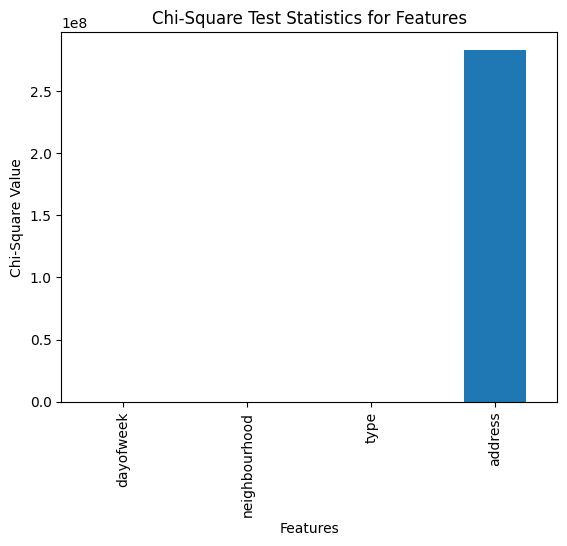

In [ ]:
# Create a Pandas Series to hold the Chi-square values with feature names as index
chi_values = pd.Series(chi2_stat, index=X.columns)

# Display the Chi-square values
print(chi_values)

# Sort the values in ascending order
chi_values.sort_values(ascending=True, inplace=True)

# Plot the Chi-square values as a bar chart
chi_values.plot.bar()
plt.title("Chi-Square Test Statistics for Features")
plt.xlabel("Features")
plt.ylabel("Chi-Square Value")
plt.show()

### modelling

In [ ]:
from sklearn.model_selection import train_test_split
# Step 1: Split the Data
X = df_new1[['longitude','latitude']]
y = df_new1[['type']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Train the model
rf_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32      9514
           1       0.37      0.34      0.35     14548
           2       0.00      0.00      0.00        50
           3       0.38      0.27      0.32     21654
           4       1.00      1.00      1.00     15392
           5       0.63      0.68      0.66     44006
           6       0.50      0.65      0.56     48594
           7       0.21      0.08      0.11      7507
           8       0.22      0.12      0.15      9050
           9       0.19      0.05      0.07        64
          10       0.88      0.80      0.84      5839

    accuracy                           0.55    176218
   macro avg       0.43      0.39      0.40    176218
weighted avg       0.53      0.55      0.53    176218

Accuracy: 55.08%


In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Naive Bayes Classifier
nb_model = GaussianNB()

# Step 3: Train the model
nb_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = nb_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9514
           1       0.15      0.04      0.06     14548
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00     21654
           4       1.00      1.00      1.00     15392
           5       0.33      0.65      0.43     44006
           6       0.29      0.41      0.34     48594
           7       0.00      0.00      0.00      7507
           8       0.00      0.00      0.00      9050
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00      5839

    accuracy                           0.37    176218
   macro avg       0.16      0.19      0.17    176218
weighted avg       0.26      0.37      0.29    176218

Accuracy: 36.59%


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the Decision Tree Classifier
# You can specify hyperparameters like max_depth, criterion, etc.
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Train the model
dt_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.32      0.34      9514
           1       0.36      0.39      0.37     14548
           2       0.00      0.00      0.00        50
           3       0.37      0.30      0.33     21654
           4       1.00      1.00      1.00     15392
           5       0.63      0.68      0.66     44006
           6       0.51      0.62      0.56     48594
           7       0.23      0.07      0.10      7507
           8       0.22      0.09      0.13      9050
           9       0.10      0.05      0.06        64
          10       0.86      0.80      0.83      5839

    accuracy                           0.55    176218
   macro avg       0.42      0.39      0.40    176218
weighted avg       0.53      0.55      0.53    176218

Accuracy: 54.96%


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 3: Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Step 4: Make Predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the K-Nearest Neighbors Classifier
# Adjust the number of neighbors (n_neighbors) as needed
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to any value

# Step 2: Train the model
knn_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to handle the shape of y_train

# Step 3: Make Predictions
y_pred = knn_model.predict(X_test)

# Step 4: Evaluate the Model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train.values.ravel())

# Step 3: Make Predictions
y_pred = adaboost_model.predict(X_test)

# Step 4: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


### Time series analysis using Holt-winters forecasting

#### What can we expect in terms of crime in Vancouver in the future?

In [ ]:
# grouping date and crimes occured
# original df
date_count = df.groupby(['date']).size().reset_index(name="crimes")
date_count

In [ ]:
#checking for null values
date_count.isnull().sum()

In [ ]:
# converting date column as index
date_count = date_count.groupby('date').sum()
date_count

In [ ]:
# resampling
date_count = date_count.resample(rule = 'MS').sum()
date_count

In [ ]:
date_count.plot()
plt.grid()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'date_count' is time series data, which could be a pandas Series
# For example, date_count might be a Series with a datetime index.

# Perform seasonal decomposition
result = seasonal_decompose(date_count, model='additive', period=4)

# Plot the decomposition
result.plot()


In [ ]:
#splitting the data
train = date_count.iloc[:182]
test = date_count.iloc[182:]

In [ ]:
train

In [ ]:
test

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Initializing the model
hwmodel = ExponentialSmoothing(date_count.crimes,trend = 'add', seasonal = 'mul',seasonal_periods = 4).fit()

In [ ]:
# forecasting
pred = hwmodel.forecast(24)
pred

In [ ]:
# plotting the future predictions
date_count['crimes'].plot(legend = True , label = 'crimes' ,figsize=(10,7))
pred.plot(legend = True , label = 'Predicted', figsize=(10,7))
plt.xlabel('year')
plt.ylabel('count of crimes')
plt.title('Future trend analysis')
plt.grid()